# ENCODER DECODER MODEL FOR WORD LEVEL EMBEDDING

In [ ]:
## LOADING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm 
import tensorflow as tf
from  tensorflow.keras.preprocessing.sequence import pad_sequences
from  sklearn.model_selection import train_test_split
from tqdm import tqdm

## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## LOADING THE PROCESSED DATASET  

df= pd.read_csv("/content/drive/MyDrive/DL_JComp/processed_data.csv")
df.columns = ["enc_input","dec_input"] 
df["dec_output"] = df.dec_input
df

,enc_input,dec_input,dec_output
0,and he took in my favorite subject like soccer,and he took in my favorite subjects like soccer,and he took in my favorite subjects like soccer
1,actually who let me know about lang 8 was him,actually he was the one who let me know about ...,actually he was the one who let me know about ...
2,his kanji is ability is much better than me,his kanji ability is much better than mine,his kanji ability is much better than mine
3,we have known each other for only half a year ...,we have known each other for only half a year ...,we have known each other for only half a year ...
4,i heard a sentence last night when i watched tv,i heard a sentence last night when i was watch...,i heard a sentence last night when i was watch...
...,...,...,...
503896,i like thailand language because that pronounc...,i like thai because the pronunciation sounds cute,i like thai because the pronunciation sounds cute
503897,i ate kaomangai rise with boild chikin tomya...,i ate kaomangai rice with boiled chickin tom...,i ate kaomangai rice with boiled chickin tom...
503898,i think it is important thing to become to lik...,i think it is important to like coriander in o...,i think it is important to like coriander in o...
503899,yesterday i went to umeda station to date,i went to umeda station for dating yesterday,i went to umeda station for dating yesterday


## Adding start and end token

In [ ]:
## THE INPUTS TO THE DECODER REQUIRES SPECIAL TOKENS FOR THE START AND THE END SO WE ARE GOING TO USE 
## <start> AS BEGINING TOKEN
## <end>  AS END TOKEN

df["dec_input"]= "<start> " + df["dec_input"]
df["dec_output"] =  df["dec_output"] + " <end>" 
df

,enc_input,dec_input,dec_output
0,and he took in my favorite subject like soccer,<start> and he took in my favorite subjects li...,and he took in my favorite subjects like socce...
1,actually who let me know about lang 8 was him,<start> actually he was the one who let me kno...,actually he was the one who let me know about ...
2,his kanji is ability is much better than me,<start> his kanji ability is much better than ...,his kanji ability is much better than mine <end>
3,we have known each other for only half a year ...,<start> we have known each other for only half...,we have known each other for only half a year ...
4,i heard a sentence last night when i watched tv,<start> i heard a sentence last night when i w...,i heard a sentence last night when i was watch...
...,...,...,...
503896,i like thailand language because that pronounc...,<start> i like thai because the pronunciation ...,i like thai because the pronunciation sounds c...
503897,i ate kaomangai rise with boild chikin tomya...,<start> i ate kaomangai rice with boiled chic...,i ate kaomangai rice with boiled chickin tom...
503898,i think it is important thing to become to lik...,<start> i think it is important to like corian...,i think it is important to like coriander in o...
503899,yesterday i went to umeda station to date,<start> i went to umeda station for dating yes...,i went to umeda station for dating yesterday <...


## Splitting And Sampling around 100k datapoints

---
##### THE TOTAL DATASET HAS 500K DATAPOINTS WHICH WILL TAKE MUCH HIGHER TRAINING TIME. THEREFORE I AM SAMPLING ONE-FIFTH OF THE TOTAL DATASET



In [ ]:
df_sampled = df.sample(frac= 0.2,random_state=1)

In [ ]:
## ONCE THE DATA IS SAMPLED WE ARE SPLITTIND THE DATA IN TO TRAIN AND TEST

df_train ,df_val = train_test_split(df_sampled,test_size=0.2,random_state = 3 )

In [ ]:
## IN THE COLUMN WHICH HAS DECODER INPUTS ADDING "<end>" TOKEN TO BE LEARNED BY THE TOKENIZER

df_train["dec_input"].iloc[0]  = df_train.iloc[0]["dec_input"] + " <end>"
df_train

,enc_input,dec_input,dec_output
20445,and last time i went there i was not able to t...,<start> and the last time i went there i was n...,and the last time i went there i was not able ...
501592,as you know in the japan happen big earthquake...,<start> as you know in japan a big earthquake ...,as you know in japan a big earthquake occurred...
141711,after i studied the esl school in the universi...,<start> after i studied at the esl school in t...,after i studied at the esl school in the unive...
240451,all muslims celebrat in ead because ramadan ...,<start> all muslims celebrate in eid because r...,all muslims celebrate in eid because ramadan i...
100580,then it makes me studying even harder,<start> that makes my studying even harder,that makes my studying even harder <end>
...,...,...,...
139578,and i lost her strength and cheerfuness long t...,<start> i lost her strength and cheerfulness a...,i lost her strength and cheerfulness a long ti...
390117,i just can tell which one read more naturally ...,<start> i just can tell which one read more na...,i just can tell which one read more naturally ...
475596,so i buy a fiction named the lost symbol whi...,<start> so i buy a fiction named the lost sym...,so i buy a fiction named the lost symbol whi...
158997,i almost prepared presentations today,<start> i have almost prepared my presentation...,i have almost prepared my presentations today ...


In [ ]:
## VALIDATION DATA
df_val

,enc_input,dec_input,dec_output
222675,however i felt there was something wrong with ...,<start> however i felt there was something wro...,however i felt there was something wrong with ...
64343,mu future plan,<start> my future plans,my future plans <end>
82998,i was so thanksfull to him every time,<start> i am so thankful to him every time,i am so thankful to him every time <end>
301188,oh i have to study japanese,<start> oh i have to study japanese,oh i have to study japanese <end>
379628,i taked him our life and girlfreind and job,<start> i talked him our lives and girlfreinds...,i talked him our lives and girlfreinds and job...
...,...,...,...
310171,i think hammerfest in the north norway and sai...,<start> i think hammerfest in the north of nor...,i think hammerfest in the north of norway and ...
388587,can we find the true love in china now,<start> can we find true love in china now,can we find true love in china now <end>
331113,and their stomach seem very softly,<start> and its stomach seems very soft,and its stomach seems very soft <end>
141340,it is fine today,<start> it is fine today,it is fine today <end>


In [ ]:
## HERE WE Are SAMPLING 1000 POINTS FROM THE DATAFRAME AS TEST DATA WHICH ARE NOT PRESEENT IN THE TRAIN AND VALIDAION DATA
np.random.seed(5) 
df_test = df.loc[np.random.choice(np.array([x for x in df.index.values if x not in df_sampled.index.values]),1000,replace= False,)]
df_test

,enc_input,dec_input,dec_output
144583,you are meeting your friends and going to a ba...,<start> you are meeting your friends and going...,you are meeting your friends and going to a ba...
455599,but since i got here i have not studied a lot,<start> but since i got here i have not studie...,but since i got here i have not studied very ...
13922,we had lunch with them in a house flooded by t...,<start> we had lunch with those whose house ha...,we had lunch with those whose house had been f...
128968,an professor introduced me to her,<start> a professor introduced me to her,a professor introduced me to her <end>
402800,his companions were having drinks in front of ...,<start> his companions were having drinks in f...,his companions were having drinks in front of ...
...,...,...,...
352632,so many people is suffuring from hunger povert...,<start> so many people are suffering from hung...,so many people are suffering from hunger and p...
191449,i wish i could be of some help during this big...,<start> i hope to offer some help in this big ...,i hope to offer some help in this big change b...
179722,anyway what i hope is he will come to shanghai...,<start> anyway what i hope is that he will com...,anyway what i hope is that he will come to sha...
38604,i just saw something on the facebook,<start> i just saw something on facebook,i just saw something on facebook <end>


## Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
## TOKENIZER FOR ENCODER INPUT
tk_inp = Tokenizer()
tk_inp.fit_on_texts(df_train.enc_input.apply(str))

NameError: ignored

In [ ]:
# TOKENIZER FOR DECODER INPUT
tk_out = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n' )
tk_out.fit_on_texts(df_train.dec_input.apply(str))

NameError: ignored

## DATA PIPELINE

In [ ]:
## THIS CLASS CONVERTS TEXT DATA TO INTEGER SEQUENCES AND RETURNS THE PADDED SEQUENCES

class Dataset :
    def __init__(self, data , tk_inp ,tk_out, max_len):
        ## SETTING THE REQUIRED ATTRIBUTES
        self.encoder_inp = data["enc_input"].apply(str).values
        self.decoder_inp = data["dec_input"].apply(str).values
        self.decoder_out = data["dec_output"].apply(str).values
        self.tk_inp = tk_inp
        self.tk_out = tk_out
        self.max_len = max_len
        
    def __getitem__(self,i):
        # INPUT SEQUENCES
        self.encoder_seq = self.tk_inp.texts_to_sequences([self.encoder_inp[i]])
        # DECODER INPUT SEQUENCES 
        self.decoder_inp_seq = self.tk_out.texts_to_sequences([self.decoder_inp[i]])
        # DECODER INPUT SEQUENCES
        self.decoder_out_seq = self.tk_out.texts_to_sequences([self.decoder_out[i]])
        
        # PADDING THE ENCODER INPUT SEQUENCES
        self.encoder_seq = pad_sequences(self.encoder_seq, padding="post",maxlen = self.max_len)
        # PADDING THE DECODER INPUT SEQUENCES
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, padding="post",maxlen = self.max_len)
        # PADDING DECODER OUTPUT SEQUENCES
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq ,padding="post", maxlen = self.max_len)

        ##  RETURNING THE ENCODER INPUT , DECODER INPUT , AND DECODER OUTPUT
        return self.encoder_seq ,  self.decoder_inp_seq,  self.decoder_out_seq
    
    def __len__(self):
        # RETURN THE LEN OF INPUT ENDODER
        return len(self.encoder_inp)

In [ ]:
## THIS CLASS CONVERTES THE DATASET INTO THE REQUIRED BATCH SIZE

class Dataloader(tf.keras.utils.Sequence):
    def __init__(self,batch_size,dataset):
        # INTIALIZING THE REQUIRED VARIABLES 
        self.dataset = dataset
        self.batch_size = batch_size
        self.totl_points = self.dataset.encoder_inp.shape[0]
        
    def __getitem__(self,i):
        # STATING THE START AND STOP VATIABLE CONTAINGING INDEX VALUES FOR EACH BATCH
        start = i * self.batch_size
        stop = (i+1)*self.batch_size
        
        # PLACEHOLDERS FOR BATCHED DATA
        batch_enc =[]
        batch_dec_input = []
        batch_dec_out =[]

        for j in range(start,stop): 
            
            a,b,c = self.dataset[j] 
            batch_enc.append(a[0]) 
            batch_dec_input.append(b[0])
            batch_dec_out.append(c[0]) 
        
        # Conveting list to array   
        batch_enc = (np.array(batch_enc)) 
        batch_dec_input = np.array(batch_dec_input)
        batch_dec_out = np.array(batch_dec_out)
        
        ## RETURNING BATCHED DATA IN REQUIRED FORM
        return [batch_enc , batch_dec_input],batch_dec_out
    
    def __len__(self):
        # Returning the number of batches
        return int(self.totl_points/self.batch_size)

###### NOTE: WE ARE TAKING THE MAXIMUM LENGHT EQUAL TO 35 WHICH IS 99 PERCENTILE OF THE WORD LENGTH DISTRUBUTION

In [ ]:
# FORMING OBJECTS OF DATASET AND DATALOADER FOR TRAIN DATASET
train_dataset = Dataset(df_train,tk_inp,tk_out,35)
train_dataloader = Dataloader( batch_size = 512, dataset=train_dataset)

# FORMING OBJECTS OF DATASET AND DATALOADER FOR VALIDATION DATASET
val_dataset = Dataset(df_val , tk_inp,tk_out,35)
val_dataloader = Dataloader(batch_size=512 , dataset=val_dataset)

## Encoder Decoder Model

In [ ]:
## LOADING THE TENSORFLOW LIBRARIES

from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
## DEFINING THE ENCODER LAYER AS A FUNCTION

def encoder(input_shape,vocab, emb_output, lstm_units, enc_input):
    '''THIS FUNCTION TAKES IN THE SEQUENCES AND RETURNS THE ENCODER OUTPUT'''
    ## FIRST LAYER : EMBEDDING LAYER
    enc_emb = layers.Embedding(vocab, emb_output,mask_zero = True,input_length=input_shape)(enc_input)
    ## SECOND LAYER : LSTM LAYER
    enc_lstm , enc_state_h,enc_state_c = layers.LSTM(units= lstm_units,return_sequences=True,return_state=True)(enc_emb)
    ## RETURNING THE LSTM OUTPUTS AND STATES
    return enc_lstm , enc_state_h,enc_state_c


## DEFINING THE DECODER LAYER AS A FUNCTION 
def decoder(input_shape,vocab, emb_output, lstm_units,enc_states, dec_input):
  ## FIRST LAYER : EMBEDDING LAYER
  dec_emb = layers.Embedding(vocab, emb_output , mask_zero = True,input_length=input_shape)(dec_input)
  ## SECONG LAYER : LSTM LAYER
  dec_lstm, dec_state_h,dec_state_c = layers.LSTM(units=lstm_units,return_sequences=True,return_state=True)(dec_emb,initial_state= enc_states)
  ## RETURNING THE LSTM OUTPUTS AND STATES
  return dec_lstm, dec_state_h,dec_state_c

In [ ]:
## DEFINING THE MODEL ARCHITECTURE

# INPUT LAYER
enc_input = layers.Input(shape=(35))
# ENCODER DEFINED FORM FUNCTON ABOVE
enc_lstm , enc_state_h,enc_state_c = encoder(35,len(tk_inp.word_index)+1 , 300 ,256, enc_input )


# DECODER INPUT LAYER
dec_input = layers.Input(shape = (35))
# DECODER DEFINEA FROM ABOVE FUNCTION
dec_lstm , dec_state_h,dec_state_c = decoder(35,len(tk_out.word_index)+1 , 300 , 256 , [enc_state_h,enc_state_c],dec_input)
# DENCSE LAYER CONNECTOD TO DECODER OUTPUT
dense = layers.Dense(len(tk_out.word_index)+1,activation="softmax")(dec_lstm)

# MODEL DEFINING
model  = Model(inputs=[enc_input,dec_input],outputs=dense)


In [ ]:
# MODEL SUMMARY
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 300)      9493800     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 35, 300)      8053800     ['input_2[0][0]']                
                                                                                              

In [ ]:
## DEFINING THE CALLBACKS
callback =[ tf.keras.callbacks.ModelCheckpoint( "/content/drive/MyDrive/ColabNotebooks/cs2/model_save/word_trainable_embedding/besh",save_best_only=True,mode="min" ,save_weights_only=True),
           tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,verbose=1,min_delta=0.0001)
]

## STORING THE NUMBER OF STEPS IN ONE EPOCH FOR TRAIN AND VALIDATION DATASET
train_steps = train_dataloader.__len__()
val_steps  = val_dataloader.__len__()

# COMPILING THE MODEL
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy')

In [ ]:
## FITTING THE MODEL
model.fit(train_dataloader,steps_per_epoch=train_steps,epochs=10,validation_data = val_dataloader,validation_steps =val_steps,callbacks=callback)

Epoch 1/10
157/157 [==============================] - 182s 737ms/step - loss: 2.1785 - val_loss: 1.9830
Epoch 2/10
157/157 [==============================] - 112s 714ms/step - loss: 1.9279 - val_loss: 1.7771
Epoch 3/10
157/157 [==============================] - 112s 714ms/step - loss: 1.7499 - val_loss: 1.6485
Epoch 4/10
157/157 [==============================] - 113s 718ms/step - loss: 1.6206 - val_loss: 1.5479
Epoch 5/10
157/157 [==============================] - 112s 715ms/step - loss: 1.5091 - val_loss: 1.4659
Epoch 6/10
157/157 [==============================] - 113s 719ms/step - loss: 1.4119 - val_loss: 1.4007
Epoch 7/10
157/157 [==============================] - 112s 714ms/step - loss: 1.3250 - val_loss: 1.3451
Epoch 8/10
157/157 [==============================] - 112s 715ms/step - loss: 1.2473 - val_loss: 1.3005
Epoch 9/10
157/157 [==============================] - 112s 714ms/step - loss: 1.1773 - val_loss: 1.2647
Epoch 10/10
157/157 [==============================] - 112s 716m

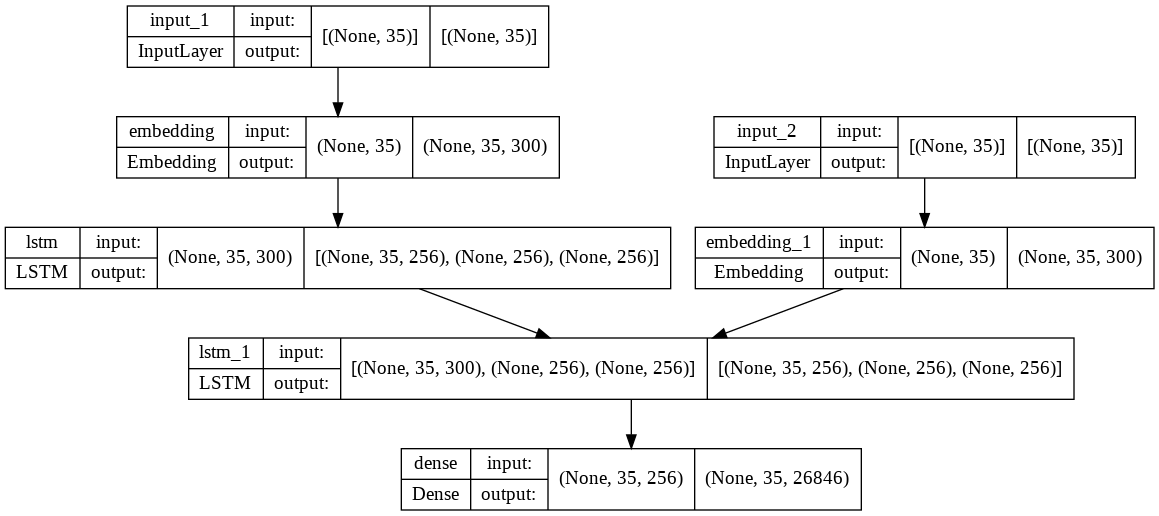

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# LOADING THE WEIGHTS FOR BEST MODEL
model.load_weights("/content/drive/MyDrive/ColabNotebooks/cs2/model_save/word_trainable_embedding/besh")

In [ ]:
## THIS FUNCTION IS USED IN THE INFERENCE TIME TO PREDICT THE RESULTS GIVEN THE INPUT TEXT

def predict(inp , model):
    ##  TAKES INPUT AS TEXT AND THE MODEL

    # CONVERT TEXT INPUT TO SEQUENCES 
    seq = tk_inp.texts_to_sequences([inp])
    # PADDING THE SEQUENCE
    seq = pad_sequences(seq,maxlen = 35,padding="post")
    ## INITIAL STATES FOR ENCODER
    state = [tf.zeros(shape=(1,256)),tf.zeros(shape= (1,256))]

    # SEQUENCE TO EMBEDDING
    enc_emb  = model.layers[2](seq)
    # PASSING EMBBEDDED SEQUENCES TO LSTM LAYER
    enc_output,state_h,state_c= model.layers[4](enc_emb,state)

    # PLACE HOLDER FOR PREDECTED WORDS
    pred = []
    # PLACE HOLDER FOR STATES 
    input_state = [state_h,state_c]
    # CURRENT VECTOR TO BE PASSED TO DECODER 
    current_vec = tf.ones((1,1))
    
    for i in range(35): # FOR i UP TO 35 (MAX LENGTH)
        ## CONVERT THE CURRENT VECTOR SEQUENCE WORD TO EMBEDDINGS
        dec_emb  = model.layers[3](current_vec)
        ## PASSING EMBEDDED VECTOR TO DECODER LSTM LAYER
        dec_output,dec_state_h,dec_state_c = model.layers[5](dec_emb , input_state)
        # PASSING DECODER OUTPUT TO DENSE LAYER
        dense = model.layers[6](dec_output)

        # SELECTING INDEX OF MAXIMUM DENSE OUTPUT AS CURRENT VECTOR
        current_vec = np.argmax(dense ,axis = -1)
        # UPDATING THE INPUT STATES
        input_state = [dec_state_h,dec_state_c]

        # APPENDING THE ACTUAL TEXT TO "pred" VARIABLE
        pred.append(tk_out.index_word[current_vec[0][0]])
        ## IF THE CURRENT VECTOR IS "<end>" BREAK THE LOOP
        if tk_out.index_word[current_vec[0][0]]=="<end>":
            break
    ## RETURN THE JOINED STRING IN LIST "pred"
    return " ".join(pred)

## PREDICTIONS ON TEST DATASET

In [ ]:
print("INPUT SENTENCE ===> ",df_test.enc_input.values[19])
print("PREDICTED SENTENCE ===> ",predict(df_test.enc_input.values[19],model))
print("ACTUAL SENTENCE ===> ",df_test.dec_output.values[19])

INPUT SENTENCE ===>  one day i was in time for the final train
PREDICTED SENTENCE ===>  one day i was at the time to the train <end>
ACTUAL SENTENCE ===>  one day i was just on time for the final train <end>


In [ ]:
print("INPUT SENTENCE ===> ",df_test.enc_input.values[50])
print("PREDICTED SENTENCE ===> ",predict(df_test.enc_input.values[50],model))
print("ACTUAL SENTENCE ===> ",df_test.dec_output.values[50])

INPUT SENTENCE ===>  i found that some of my firends had been here
PREDICTED SENTENCE ===>  i found that my friend had a lot of fun <end>
ACTUAL SENTENCE ===>  i found that some of my friends had been here <end>


## Inference Time

In [ ]:
%%time
predict(df_test.enc_input.values[50],model)

CPU times: user 120 ms, sys: 14.9 ms, total: 135 ms
Wall time: 130 ms


'i found that my friend had a lot of fun <end>'

## BELU SCORE 

In [ ]:
import nltk.translate.bleu_score as bleu

In [ ]:
# VALIDATION BELU SCORE
BLEU_val_emb = []
test_data = df_val.loc[np.random.choice(df_val.index,size = 2000)]
for ind,i in tqdm(test_data.iterrows(),position=0):
    try:
        pred = predict(str(i.enc_input),model).split()
        act = [str(i.dec_output).split()]
        b =bleu.sentence_bleu(act,pred)
        BLEU_val_emb.append(b)
    except:
        continue

2000it [04:24,  7.56it/s]


In [ ]:
print("Train BELU Score = ",np.mean(BLEU_val_emb))

Triain BELU Score =  0.4603018211234794
